In [ ]:
import pandas as pd 
from sklearn.model_selection  import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import metrics
from math import sqrt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import lag_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error ,r2_score 
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import StandardScaler

# Load and PreProcess statsmodels.tsa.holtwinters

In [2]:
data = pd.read_csv('data/PMS_data.csv',nrows=10000)

In [3]:
data.head()

,Flow,Occupy,Speed
0,133.0,0.0603,65.8
1,210.0,0.0589,69.6
2,124.0,0.0358,65.8
3,145.0,0.0416,69.6
4,206.0,0.0493,69.4


In [4]:

ratio = 0.80
scaler=StandardScaler()
data=data.drop(columns=["Occupy","Speed"])
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
train_set = data[0:train_size]
test_set = data[train_size:]
node = 'Flow'
train_set =scaler.fit_transform(train_set)
test_set =scaler.fit_transform(test_set)

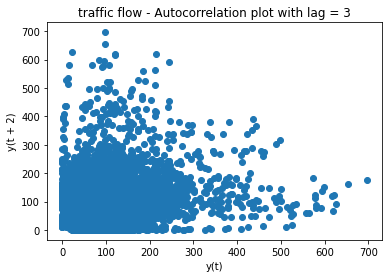

In [5]:
plt.figure()
lag_plot(data[node], lag=2)
plt.title('traffic flow - Autocorrelation plot with lag = 3')
plt.show()

In [6]:
print(len(train_set))
print(len(test_set))

7500
2500


# Train ARIMA 

In [153]:
xtrain = train_set[node].values
xtest = test_set[node].values

In [154]:
data_set = data[node]
data_set.head()

0    133.0
1    210.0
2    124.0
3    145.0
4    206.0
Name: Flow, dtype: float64

In [155]:
#auto_arima(xtrain, start_p=1, start_q=1,test='adf',max_p=5, max_q=5,m=4,d=1,seasonal=True, start_P=0, D=None, trace=True, error_action='ignore',  suppress_warnings=True, stepwise=True,information_criterion='aicc')

In [156]:
from IPython.display import clear_output

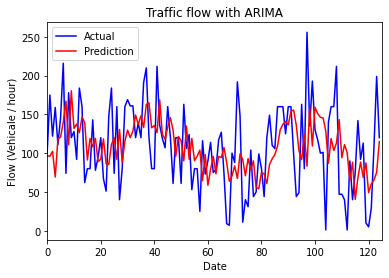

In [157]:
history = xtrain.tolist()
predictions = list()
r2 = list()
rmse = list()
for t in range(len(xtest)):
    model = ARIMA(history, order=(5,1,0), seasonal_order=(1,0,1,12))
    #model = ExponentialSmoothing(history)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = xtest[t]
    history.append(obs)
    plt.plot(xtest,color = 'blue',label = "Actual")
    plt.plot(predictions, color='red', label = "Prediction")
    plt.xlabel('Date')
    plt.ylabel("Flow (Vehicale / hour)")
    plt.title('Traffic flow with ARIMA')
    plt.xlim(0,len(predictions))
    plt.legend()
    plt.show()
    clear_output(wait=True)


In [158]:
def plt_functions(check):
    if check == 'Speed':
        plt.figure(figsize=(10,5))
        plt.plot(xtest,label = "Test")
        plt.plot(predictions, label = "Prediction")
        plt.ylabel("Speed (Vehicale / hour)")
        plt.title('Traffic Speed with ARIMA')
        plt.xlim(10,100)
        plt.legend()
        plt.show()
    elif check == 'Flow':
        plt.figure(figsize=(10,5))
        plt.plot(xtest,label = "Test")
        plt.plot(predictions, label = "Prediction")
        plt.ylabel("Flow (Vehicale / hour)")
        plt.title('Traffic Flow with ARIMA')
        plt.xlim(10,100)
        plt.legend()
        plt.show()
    elif check == 'Occupy':
        plt.figure(figsize=(10,5))
        plt.plot(xtest,label = "Test")
        plt.plot(predictions, label = "Prediction")
        plt.ylabel("Occupy (Vehicale / hour)")
        plt.title('Traffic Occupy with ARIMA')
        plt.xlim(10,100)
        plt.legend()
        plt.show()

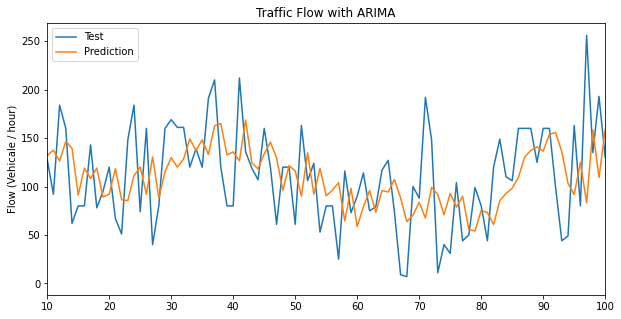

In [159]:
plt_functions(node)

In [160]:
rmse = sqrt(metrics.mean_squared_error(xtest, predictions))
mae = metrics.mean_absolute_error(xtest, predictions)
mse = metrics.mean_squared_error(xtest,predictions)

In [161]:
print(rmse)
print(mae)
print(mse)

54.44159447440965
45.23754930866561
2963.887208916071


rmse = 0.01485145174357371
mae = 0.011815022766354391
mse = 0.00022056561889169856

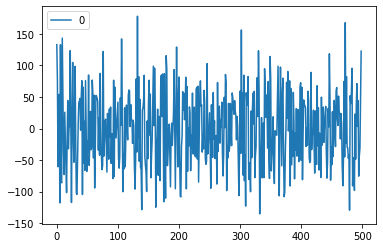

In [162]:
residuals = DataFrame(model_fit.resid) 
residuals.plot()
plt.show()

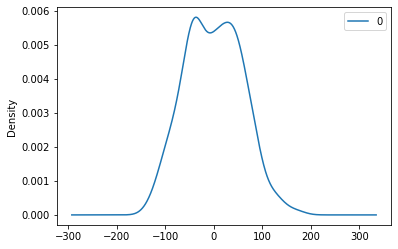

In [163]:
#we continue to check residuals
residuals.plot(kind='kde') 
plt.show()